# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

### В чем состоит проблема?

- Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
- Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
- Большинство алгоритмов показывает лучшее качество на масштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем данные из соревнования [House Prices: Advanced Regression Techniques.](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('data/laptops.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(984, 12)

In [4]:
# типы колонок
data.dtypes

Unnamed: 0            int64
img_link             object
name                 object
price(in Rs.)         int64
processor            object
ram                  object
os                   object
storage              object
display(in inch)    float64
rating              float64
no_of_ratings       float64
no_of_reviews       float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
img_link - 0
name - 0
price(in Rs.) - 0
processor - 0
ram - 0
os - 0
storage - 0
display(in inch) - 0
rating - 296
no_of_ratings - 296
no_of_reviews - 296


In [6]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 984


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

**Удаление может производиться для группы строк или колонок.**

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((984, 12), (984, 9))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((984, 12), (688, 12))

In [10]:
data.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка rating. Тип данных float64. Количество пустых значений 296, 30.08%.
Колонка no_of_ratings. Тип данных float64. Количество пустых значений 296, 30.08%.
Колонка no_of_reviews. Тип данных float64. Количество пустых значений 296, 30.08%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,rating,no_of_ratings,no_of_reviews
0,4.5,14.0,1.0
1,4.4,53.0,3.0
2,4.4,4733.0,463.0
3,4.3,10406.0,1040.0
4,3.8,18.0,3.0
...,...,...,...
979,4.0,1907.0,227.0
980,3.8,5991.0,687.0
981,4.5,22.0,5.0
982,4.0,801.0,104.0


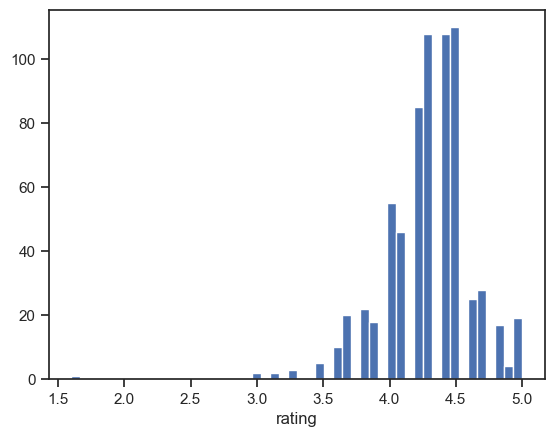

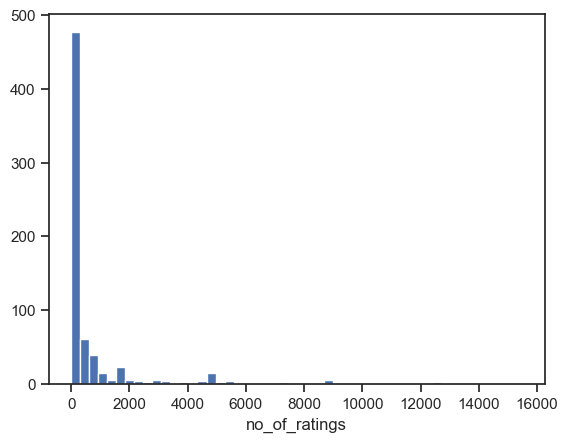

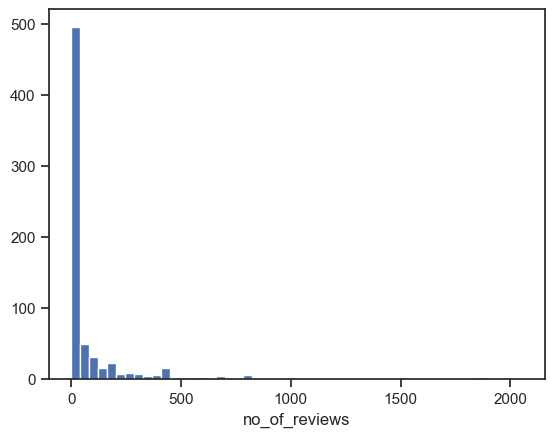

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [15]:
data_num_MasVnrArea = data_num[['rating']]
data_num_MasVnrArea.head()

,rating
0,4.5
1,4.4
2,4.4
3,4.3
4,3.8


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488372, 4.28488372, 4.28488372,
        4.28488372, 4.28488372, 4.28488

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3,
        4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5,
        4.5, 4.5, 4.5, 4.5, 4.5, 

In [23]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
data[['os']].describe()

,os
count,984
unique,11
top,64 bit Windows 11 Operating System
freq,527


In [25]:
test_num_impute_col(data, 'rating', strategies[0])

('rating', 'mean', 296, 4.284883720930233, 4.284883720930233)

In [26]:
test_num_impute_col(data, 'rating', strategies[1])

('rating', 'median', 296, 4.3, 4.3)

In [27]:
test_num_impute_col(data, 'rating', strategies[2])

('rating', 'most_frequent', 296, 4.5, 4.5)

### Обработка пропусков в категориальных данных

In [28]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

**Какие из этих колонок Вы бы выбрали или не выбрали для построения модели?**

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [29]:
cat_temp_data = data[['os']]
cat_temp_data.head()

,os
0,Windows 11 Operating System
1,64 bit Windows 11 Operating System
2,Windows 11 Operating System
3,64 bit Windows 11 Operating System
4,DOS Operating System


In [30]:
cat_temp_data['os'].unique()

array(['Windows 11 Operating System',
       '64 bit Windows 11 Operating System', 'DOS Operating System',
       'Mac OS Operating System', '64 bit Windows 10 Operating System',
       '32 bit Windows 11 Operating System', 'Chrome Operating System',
       '64 bit Chrome Operating System', 'Windows 10 Operating System',
       '64 bit DOS Operating System', '64 bit Windows 8 Operating System'],
      dtype=object)

In [31]:
cat_temp_data[cat_temp_data['os'].isnull()].shape

(0, 1)

In [32]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['DOS Operating System'],
       ['Mac OS Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['64 bit Windows 10 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Mac OS Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating 

In [33]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['32 bit Windows 11 Operating System',
       '64 bit Chrome Operating System', '64 bit DOS Operating System',
       '64 bit Windows 10 Operating System',
       '64 bit Windows 11 Operating System',
       '64 bit Windows 8 Operating System', 'Chrome Operating System',
       'DOS Operating System', 'Mac OS Operating System',
       'Windows 10 Operating System', 'Windows 11 Operating System'],
      dtype=object)

In [34]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['DOS Operating System'],
       ['Mac OS Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['Windows 11 Operating System'],
       ['64 bit Windows 10 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['Mac OS Operating System'],
       ['64 bit Windows 11 Operating System'],
       ['64 bit Windows 11 Operating 

In [35]:
np.unique(data_imp3)

array(['32 bit Windows 11 Operating System',
       '64 bit Chrome Operating System', '64 bit DOS Operating System',
       '64 bit Windows 10 Operating System',
       '64 bit Windows 11 Operating System',
       '64 bit Windows 8 Operating System', 'Chrome Operating System',
       'DOS Operating System', 'Mac OS Operating System',
       'Windows 10 Operating System', 'Windows 11 Operating System'],
      dtype=object)

In [36]:
data_imp3[data_imp3=='NA'].size

0

# Преобразование категориальных признаков в числовые

In [37]:
cat_enc = pd.DataFrame({'os':data_imp2.T[0]})
cat_enc

,os
0,Windows 11 Operating System
1,64 bit Windows 11 Operating System
2,Windows 11 Operating System
3,64 bit Windows 11 Operating System
4,DOS Operating System
...,...
979,64 bit Windows 10 Operating System
980,Chrome Operating System
981,Windows 11 Operating System
982,64 bit Windows 11 Operating System


## Кодирование категорий целочисленными значениями (label encoding)

В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

### Использование LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
cat_enc['os'].unique()

array(['Windows 11 Operating System',
       '64 bit Windows 11 Operating System', 'DOS Operating System',
       'Mac OS Operating System', '64 bit Windows 10 Operating System',
       '32 bit Windows 11 Operating System', 'Chrome Operating System',
       '64 bit Chrome Operating System', 'Windows 10 Operating System',
       '64 bit DOS Operating System', '64 bit Windows 8 Operating System'],
      dtype=object)

In [40]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['os'])

In [41]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['32 bit Windows 11 Operating System',
       '64 bit Chrome Operating System', '64 bit DOS Operating System',
       '64 bit Windows 10 Operating System',
       '64 bit Windows 11 Operating System',
       '64 bit Windows 8 Operating System', 'Chrome Operating System',
       'DOS Operating System', 'Mac OS Operating System',
       'Windows 10 Operating System', 'Windows 11 Operating System'],
      dtype=object)

In [42]:
cat_enc_le

array([10,  4, 10,  4,  7,  8,  4,  4,  4, 10,  4,  4,  4, 10, 10,  3,  4,
        4,  4,  4,  8,  4,  4,  4,  4, 10,  4,  4,  4,  4,  4, 10,  4,  4,
        4,  4, 10,  4,  4,  4,  3,  4,  4,  4,  4,  4,  0,  4,  4,  4,  3,
        4,  4,  8, 10, 10,  4,  4,  4,  4,  4, 10,  4,  4,  4,  8,  4,  4,
        4,  4, 10,  4, 10,  6,  6, 10,  4, 10,  4,  4,  4,  3,  4,  4,  4,
        4,  4,  4,  4, 10, 10,  4, 10, 10,  4,  4,  4,  4,  4, 10, 10,  8,
        8,  4,  8,  4,  4,  4,  4,  4, 10,  4,  4, 10,  4,  4,  4,  4,  8,
        4,  4,  4, 10, 10,  4,  4,  4,  4,  4,  4, 10,  4,  4,  3,  4,  4,
        4, 10,  4, 10,  3,  4,  4,  4,  8,  4,  4,  4,  3,  8, 10, 10,  4,
        3,  4,  4,  4,  4,  4,  4, 10, 10,  4,  4,  4,  4, 10,  4,  4,  4,
       10,  4,  4,  4,  4, 10,  3,  4, 10,  4,  4,  4,  3,  4,  4,  0,  8,
        4,  4,  4,  4,  4,  4,  4,  4, 10,  4,  4,  8,  4,  0,  4,  4,  4,
        4,  4,  8,  4,  4,  4,  4,  4,  4,  8,  1,  4,  4,  4,  8,  4,  4,
       10,  4, 10,  4,  4

In [43]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [44]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

array(['32 bit Windows 11 Operating System',
       '64 bit Chrome Operating System', '64 bit DOS Operating System',
       '64 bit Windows 10 Operating System',
       '64 bit Windows 11 Operating System',
       '64 bit Windows 8 Operating System', 'Chrome Operating System',
       'DOS Operating System', 'Mac OS Operating System',
       'Windows 10 Operating System', 'Windows 11 Operating System'],
      dtype=object)

### Использование OrdinalEncoder

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
data_oe = data[['os', 'storage', 'ram']]
data_oe.head()

,os,storage,ram
0,Windows 11 Operating System,512 GB SSD,16 GB DDR4 RAM
1,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,8 GB DDR4 RAM
2,Windows 11 Operating System,512 GB SSD,8 GB DDR4 RAM
3,64 bit Windows 11 Operating System,512 GB SSD,8 GB DDR4 RAM
4,DOS Operating System,256 GB SSD,4 GB DDR4 RAM


In [47]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Windows 11 Operating System', '512 GB SSD', '16 GB DDR4 RAM'],
       ['64 bit Windows 11 Operating System', '1 TB HDD|256 GB SSD',
        '8 GB DDR4 RAM'],
       ['Windows 11 Operating System', '512 GB SSD', '8 GB DDR4 RAM'],
       ...,
       ['Windows 11 Operating System', '512 GB SSD', '8 GB DDR4 RAM'],
       ['64 bit Windows 11 Operating System', '1 TB HDD|256 GB SSD',
        '8 GB DDR4 RAM'],
       ['Windows 11 Operating System', '256 GB SSD', '4 GB DDR4 RAM']],
      dtype=object)

In [48]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[10., 13.,  1.],
       [ 4.,  2., 17.],
       [10., 13., 17.],
       ...,
       [10., 13., 17.],
       [ 4.,  2., 17.],
       [10., 10., 13.]])

In [49]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [50]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [51]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

In [52]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['32 bit Windows 11 Operating System',
        '64 bit Chrome Operating System', '64 bit DOS Operating System',
        '64 bit Windows 10 Operating System',
        '64 bit Windows 11 Operating System',
        '64 bit Windows 8 Operating System', 'Chrome Operating System',
        'DOS Operating System', 'Mac OS Operating System',
        'Windows 10 Operating System', 'Windows 11 Operating System'],
       dtype=object),
 array(['1 TB HDD', '1 TB HDD|128 GB SSD', '1 TB HDD|256 GB SSD',
        '1 TB HDD|512 GB SSD', '1 TB SSD', '128 GB SSD', '2 TB HDD',
        '2 TB SSD', '256 GB HDD', '256 GB HDD|256 GB SSD', '256 GB SSD',
        '4 TB SSD', '512 GB HDD|512 GB SSD', '512 GB SSD',
        'PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability',
        'PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Displa

In [53]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Windows 11 Operating System', '512 GB SSD', '16 GB DDR4 RAM'],
       ['64 bit Windows 11 Operating System', '1 TB HDD|256 GB SSD',
        '8 GB DDR4 RAM'],
       ['Windows 11 Operating System', '512 GB SSD', '8 GB DDR4 RAM'],
       ...,
       ['Windows 11 Operating System', '512 GB SSD', '8 GB DDR4 RAM'],
       ['64 bit Windows 11 Operating System', '1 TB HDD|256 GB SSD',
        '8 GB DDR4 RAM'],
       ['Windows 11 Operating System', '256 GB SSD', '4 GB DDR4 RAM']],
      dtype=object)

### Проблемы использования LabelEncoder и OrdinalEncoder

Необходимо отметить, что LabelEncoder и OrdinalEncoder могут использоваться только для категориальных признаков в номинальных шкалах (для которых отсутствует порядок), например города, страны, названия рек и т.д. 

Это связано с тем, что задать какой-либо порядок при кодировании с помощью LabelEncoder и OrdinalEncoder невозможно, они сортируют категории в лексикографическом порядке.

При этом кодирование целыми числами создает фиктивное отношение порядка (1 < 2 < 3 < ...) которого не было в исходных номинальных шкалах. Данное отношение порядка может негативно повлиять на построение модели машинного обучения.

### Кодирование шкал порядка

Библиотека scikit-learn не предоставляет готового решения для кодирования шкал порядка, но можно воспользоваться [функцией map для отдельных объектов Series.](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [54]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [55]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [56]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [57]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['os']])

In [60]:
cat_enc.shape

(984, 1)

In [61]:
cat_enc_ohe.shape

(984, 11)

In [62]:
cat_enc_ohe

<984x11 sparse matrix of type '<class 'numpy.float64'>'
	with 984 stored elements in Compressed Sparse Row format>

In [63]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [64]:
cat_enc.head(10)

,os
0,Windows 11 Operating System
1,64 bit Windows 11 Operating System
2,Windows 11 Operating System
3,64 bit Windows 11 Operating System
4,DOS Operating System
5,Mac OS Operating System
6,64 bit Windows 11 Operating System
7,64 bit Windows 11 Operating System
8,64 bit Windows 11 Operating System
9,Windows 11 Operating System


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [65]:
pd.get_dummies(cat_enc).head()

,os_32 bit Windows 11 Operating System,os_64 bit Chrome Operating System,os_64 bit DOS Operating System,os_64 bit Windows 10 Operating System,os_64 bit Windows 11 Operating System,os_64 bit Windows 8 Operating System,os_Chrome Operating System,os_DOS Operating System,os_Mac OS Operating System,os_Windows 10 Operating System,os_Windows 11 Operating System
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [66]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,os_32 bit Windows 11 Operating System,os_64 bit Chrome Operating System,os_64 bit DOS Operating System,os_64 bit Windows 10 Operating System,os_64 bit Windows 11 Operating System,os_64 bit Windows 8 Operating System,os_Chrome Operating System,os_DOS Operating System,os_Mac OS Operating System,os_Windows 10 Operating System,os_Windows 11 Operating System,os_nan
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['rating']])

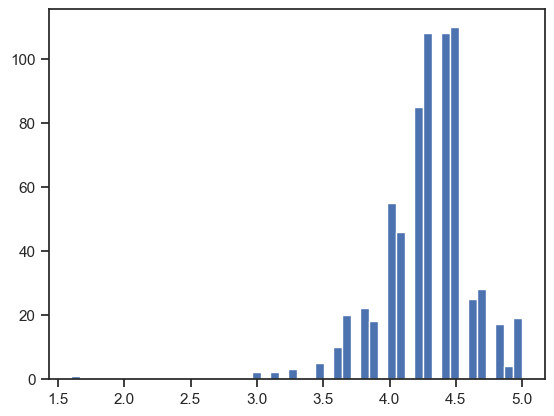

In [69]:
plt.hist(data['rating'], 50)
plt.show()

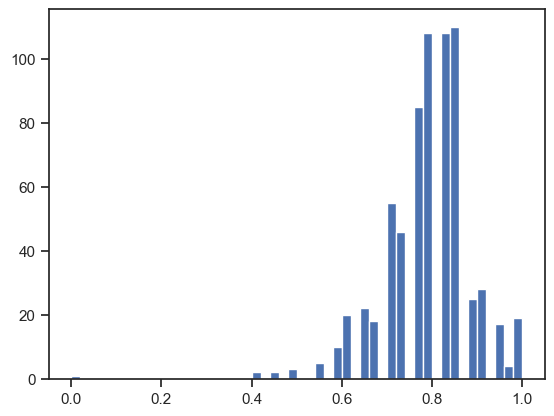

In [70]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [71]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['rating']])

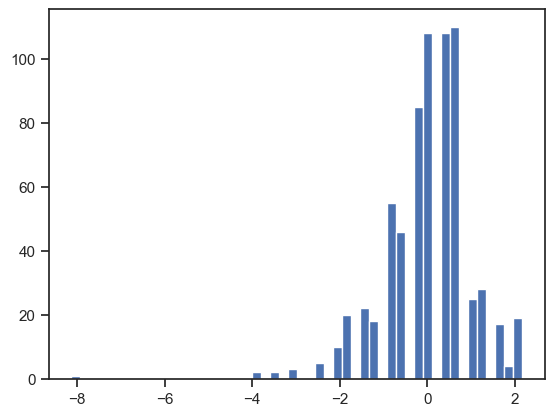

In [72]:
plt.hist(sc2_data, 50)
plt.show()